In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("covtype.data")
df.head(5)

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [5]:
df.rename(
    columns={
        "2596": "Elevation",
        "51": "Aspect",
        "3": "Slope",
        "258": "Horizontal_Distance_To_Hydrology",
        "0": "Vertical_Distance_To_Hydrology",
        "510": "Horizontal_Distance_To_Roadways",
        "221": "Hillshade_9am",
        "232": "Hillshade_Noon",
        "148": "Hillshade_3pm",
        "6279": "Horizontal_Distance_To_Fire_Points",
        "5": "Cover_Type"
    },
    inplace=True
)

In [4]:
#cleanup_nums = {"Cover_Type":
#    {
#        1: "Spruce/Fir",
#        2: "Lodgepole_Pine",
#        3: "Ponderosa_Pine",
#        4: "Cottonwood/Willow",
#        5: "Aspen",
#        6: "Douglas-fir",
#        7: "Krummholz"
#    }
#}
#df = df.replace(cleanup_nums)

<AxesSubplot:>

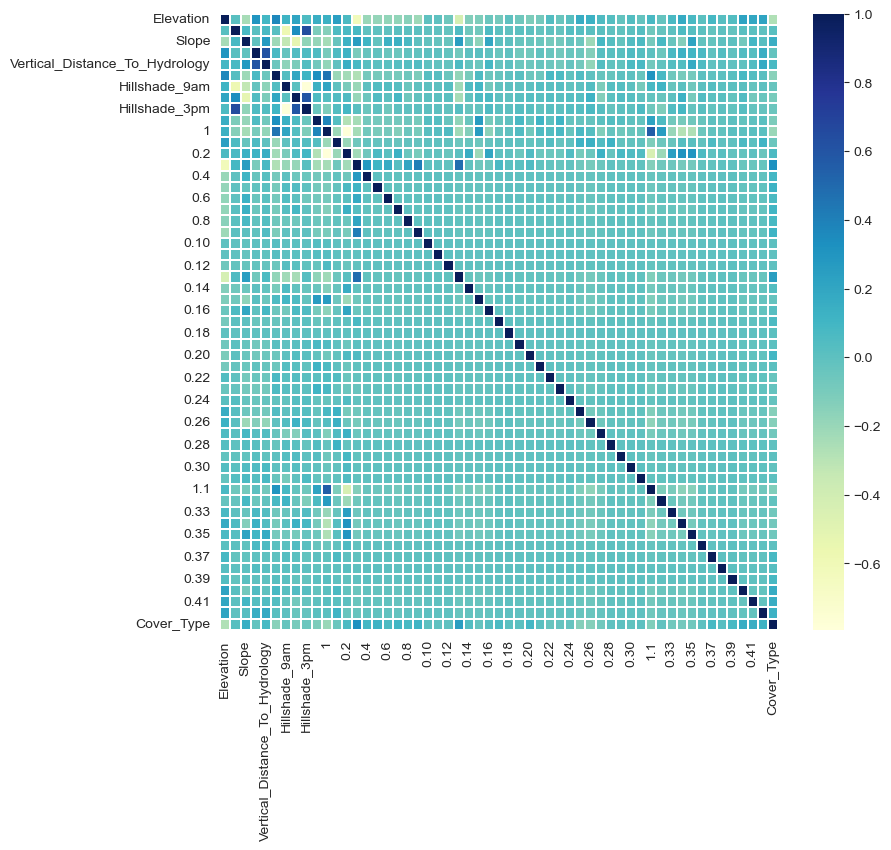

In [7]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df.corr(), ax=ax, cmap="YlGnBu", linewidths=0.1)

In [37]:
X = df.iloc[:, 0:-1]
y = df["Cover_Type"]

<AxesSubplot:ylabel='Cover_Type'>

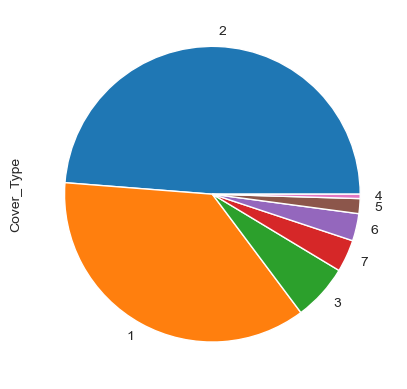

In [44]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)
y.value_counts().plot.pie()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.1)

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [85]:
logic_model = LogisticRegression(
    solver='liblinear',
    C=0.05,
    multi_class='ovr',
    random_state=0,
)
logic_model.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [86]:
X_test = scaler.transform(X_test)
y_pred = logic_model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.27      0.38     21307
           2       0.60      0.71      0.65     28345
           3       0.61      0.34      0.44      3553
           4       0.06      0.66      0.11       251
           5       0.07      0.38      0.12       896
           6       0.23      0.34      0.27      1684
           7       0.41      0.81      0.55      2066

    accuracy                           0.51     58102
   macro avg       0.38      0.50      0.36     58102
weighted avg       0.59      0.51      0.51     58102

